In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nolds
from nolitsa import lyapunov,dimension,delay,noise

# Para estimar el máximo exponente de lyapunov tenemos la siguiente referencia

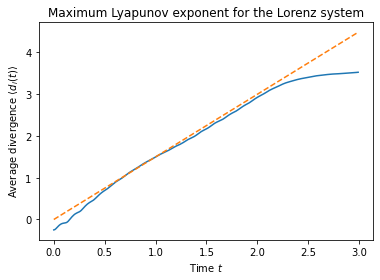

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Maximum Lyapunov exponent for the Lorenz system.
Our estimate is quite close to the "accepted" value of 1.50.
Cf. Fig. 2 of Rosenstein et al. (1993).
"""

from nolitsa import data, lyapunov
import numpy as np
import matplotlib.pyplot as plt

sample = 0.01
x0 = [0.62225717, -0.08232857, 30.60845379]
x = data.lorenz(length=5000, sample=sample, x0=x0,
                sigma=16.0, beta=4.0, rho=45.92)[1][:, 0]

# Choose appropriate Theiler window.
window = 60

# Time delay.
tau = 13

# Embedding dimension.
dim = [5]

d = lyapunov.mle_embed(x, dim=dim, tau=tau, maxt=300, window=window)[0]
t = np.arange(300)

plt.title('Maximum Lyapunov exponent for the Lorenz system')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
plt.plot(sample * t, d)
plt.plot(sample * t, sample * t * 1.50, '--')

plt.show()

# Hagamos lo mismo, pero estimando cada uno de los parametros a partir de la serie de tiempo.

In [4]:
#Funcion util para encontrar minimos locales.
def localmin(x):
    """Return all local minima from the given data set.
    Returns all local minima from the given data set.  Note that even
    "kinky" minima (which are probably not real minima) will be
    returned.
    Parameters
    ----------
    x : array
        1D scalar data set.
    Returns
    -------
    i : array
        Array containing location of all local minima.
    """
    return (np.diff(np.sign(np.diff(x))) > 0).nonzero()[0] + 1

In [5]:
X=x

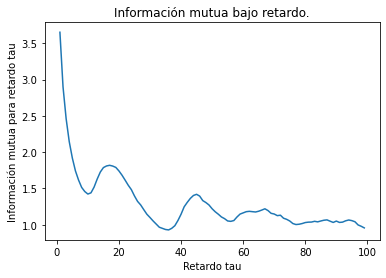

In [6]:
#Calculo de la información mutua entre X_t, X_(t+tau)
time_delay_mi=np.zeros(99)
for tau in range(1,100):
    td=delay.mi(X[:-tau],X[tau:])
    time_delay_mi[tau-1]=td
plt.plot(range(1,100),time_delay_mi)
plt.title('Información mutua bajo retardo.')
plt.xlabel('Retardo tau')
plt.ylabel('Información mutua para retardo tau')
plt.show()

In [7]:
print('Los mínimos locales se alcanzan para tau='+ str(localmin(time_delay_mi)+1))

Los mínimos locales se alcanzan para tau=[10 36 56 64 71 77 84 89 91]


usamos tau=10

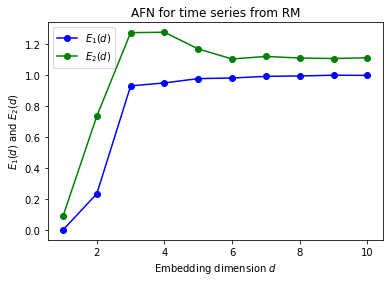

In [8]:
# AFN algorithm.
dim = np.arange(1, 10 + 2)
E, Es = dimension.afn(X, tau=10, dim=dim, window=30)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.title(r'AFN for time series from RM')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

Escogemos dimension de inmersion=6

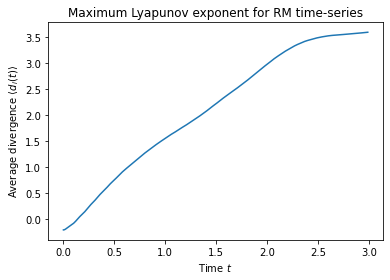

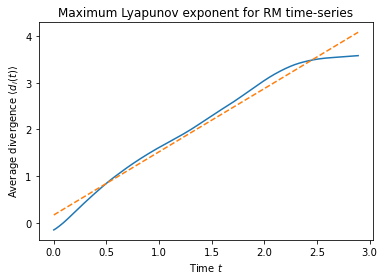

Linear fitting coeficient=1.351250920264517


In [9]:
LEs=lyapunov.mle_embed(X, dim=[6], tau=10, window=30, maxt=500)[0]
plt.plot((np.arange(len(LEs))*sample)[:300],LEs[:300])
plt.title('Maximum Lyapunov exponent for RM time-series')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
plt.show()

sma=noise.sma(LEs[:300], hwin=5)
plt.title('Maximum Lyapunov exponent for RM time-series')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
plt.plot(np.arange(len(sma))*sample,sma)
p = np.polyfit(np.arange(len(sma))*sample, sma,deg=1)
xaxis = np.arange(len(sma))*sample
yaxis = p[1] + p[0] * xaxis
plt.plot(xaxis, yaxis, '--')
plt.show()
print('Linear fitting coeficient='+str(p[0]))
MLE_nolitsa=p[0]

In [10]:
#Con nolds

In [11]:
MLE_nolds=nolds.lyap_r(X, emb_dim=6, lag=10, min_tsep=30, tau=sample, 
             min_neighbors=20, trajectory_len=20, fit='RANSAC', 
             debug_plot=False, debug_data=False, plot_file=None, fit_offset=0)

In [12]:
print("Valor obtenido de MLE con nolitsa: "+str(MLE_nolitsa))
print("Valor obtenido de MLE con nolds: "+str(MLE_nolds))

Valor obtenido de MLE con nolitsa: 1.351250920264517
Valor obtenido de MLE con nolds: 1.6461964605614214
